In [37]:
# https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred):
#     return mean_absolute_error(y_true, y_pred) * 100


# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html
# https://stackoverflow.com/questions/47648133/mape-calculation-in-python
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

# https://stackoverflow.com/questions/49604269/run-all-regressors-against-the-data-in-scikit
def evaluate_model(mas, model, X_train, y_train, X_test, y_test, model_name, if_plot):
    # fit the model
    model.fit(X_train, y_train)

    # predict the values using training data
    train_pred = model.predict(X_train)

    # evaluate using training data
    train_rmse = rmse(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_mape = mape(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)
    
    # print the results of the training data
    print("---Training data results---\n")
    print("Root Mean Squared Error: {:.2f}\n".format(train_rmse))
    print("Mean Absolute Error: {:.2f}\n".format(train_mae))
    print("Mean Absolute Percentage Error: {:.2f}\n".format(train_mape))
    print("R Square: {:.2f}\n".format(train_r2))
    
    # predict the values using testing data
    test_pred = model.predict(X_test)

    # evaluate using testing data
    test_rmse = rmse(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_mape = mape(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    
        # print the results of the testing data
    print("-----Testing data results-----\n")
    print("Root Mean Squared Error: {:.2f}\n".format(test_rmse))
    print("Mean Absolute Error: {:.2f}\n".format(test_mae))
    print("Mean Absolute Percentage Error: {:.2f}\n".format(test_mape))
    print("R Square: {:.2f}\n".format(test_r2))
    
    if if_plot=="Yes":
        plot_model(mas, y_train,y_test,train_pred,test_pred,model_name)
    else:
        print("No plot")
        
    tree_explained=['EXTR','Gradient Boosting','Random Forest','Light GBM','Xgboost','Catboost']
    
    if model_name in tree_explained:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)
        shap.summary_plot(shap_values, X_train, plot_type='bar')
        shap.summary_plot(shap_values, X_train)

        shap.initjs()

#         for i in range(len(X_test)):
#             display(shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[i], 
#             feature_names=X_train.columns))
            
    return train_rmse, train_mae, train_mape, train_r2, test_rmse, test_mae, test_mape, test_r2

def plot_model(mas, y_train,y_test,train_pred,test_pred,model_name):
    
    train_pred = mas.inverse_transform(train_pred.reshape(-1,1))
    y_train = mas.inverse_transform(y_train.reshape(-1,1))
    
    test_pred = mas.inverse_transform(test_pred.reshape(-1,1))
    y_test = mas.inverse_transform(y_test.reshape(-1,1))

    
    # Assuming you have a list of time points or indices
    time_points_train = range(len(y_train))
    time_points_test = range(len(y_train), len(y_train) + len(y_test))

    # Create a figure and axis for the time series plot
    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.plot(time_points_train, y_train, label='Actual Train Data', color='blue')

    # Plot testing data
    plt.plot(time_points_test, y_test, label='Actual Test Data', color='green')

    # Plot training predictions
    plt.plot(time_points_train, train_pred, label=str(model_name)+' Train Predictions', color='red')

    # Plot testing predictions
    plt.plot(time_points_test, test_pred, label=str(model_name)+' Test Predictions', color='orange')

    # Add labels and legend
    plt.xlabel('Time/Iterations')
    plt.ylabel('Values')
    plt.legend()

    # Set a title for the plot
    plt.title(str(model_name)+' - Train and Test Data vs. Predictions')

    # Show the plot
    plt.grid(True)
    plt.show()
    

def feature_importance(model, X_train, model_name):
    features = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    # customized number 
    num_features = 25

    plt.figure(figsize=(10,10))
    plt.title('Feature Importances')

    # only plot the customized number of features
    plt.barh(range(num_features), importances[indices[-num_features:]], color='r', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
    plt.xlabel(str(model_name)+'s Feature Importance')
    plt.show();

In [2]:
## Important
# https://datascience.stackexchange.com/questions/51323/how-to-interpret-metrics-of-a-model-after-scaling-the-data
# https://www.quora.com/When-is-it-necessary-to-normalize-time-series-data-for-predictive-analysis-and-when-is-it-not

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import time
import shap

pd.options.mode.chained_assignment = None

In [4]:
timed_df=pd.read_excel("InvoiceData_concate_cleaned_grouped_flu_stock_weekly.xlsx")
# timed_df.drop('Date', axis = 1,inplace=True)

In [5]:
timed_df

,reference_date,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,...,Volume_HELX,Volume_IHI,Volume_XLV,Close_HELX,Close_IHI,Close_XLV,Volume_DHR,Volume_TMO,Close_DHR,Close_TMO
0,2020-12-28,1,0,4,0,2,2,1,0,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-01-04,269,162,651,135,155,143,254,5,256,...,15.166667,4.844308,4.924573,5.268076,5.121616,5.101993,5.281879,4.839443,5.248175,5.187106
2,2021-01-11,308,144,630,116,52,102,236,14,310,...,16.000000,19.492188,2.868756,5.559773,5.171015,5.180700,3.659546,3.800261,5.367111,5.328049
3,2021-01-18,256,226,579,111,37,134,206,27,282,...,21.833333,7.587054,2.632809,5.725794,5.194018,5.213370,3.757839,3.764727,5.290732,5.411640
4,2021-01-25,289,299,644,172,65,151,190,11,208,...,26.722222,5.302455,3.767980,5.469415,5.140734,5.149713,5.278497,4.155422,5.199749,5.331101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2023-07-31,356,70,716,208,110,105,150,22,192,...,1.277778,4.435826,4.543038,3.483506,5.138399,6.129355,4.356084,3.272564,5.793910,5.850718
136,2023-08-07,421,79,770,220,144,133,178,13,270,...,1.500000,5.422340,3.703318,3.445455,4.991897,6.202016,2.430290,2.152765,5.809344,5.852700
137,2023-08-14,321,93,698,186,95,169,160,28,205,...,0.277778,3.797898,3.712186,3.398299,4.893918,6.191991,2.743586,2.384435,5.745437,5.694502
138,2023-08-21,358,96,691,160,91,82,159,41,224,...,0.666667,3.473214,3.085503,3.395135,4.817961,6.128528,2.664933,2.571429,5.720046,5.720438


In [6]:
train=timed_df[timed_df['reference_date']<'2023-05-01']

In [7]:
test=timed_df[timed_df['reference_date']>='2023-05-01']

In [8]:
timed_df.head()

,reference_date,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,...,Volume_HELX,Volume_IHI,Volume_XLV,Close_HELX,Close_IHI,Close_XLV,Volume_DHR,Volume_TMO,Close_DHR,Close_TMO
0,2020-12-28,1,0,4,0,2,2,1,0,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-01-04,269,162,651,135,155,143,254,5,256,...,15.166667,4.844308,4.924573,5.268076,5.121616,5.101993,5.281879,4.839443,5.248175,5.187106
2,2021-01-11,308,144,630,116,52,102,236,14,310,...,16.000000,19.492188,2.868756,5.559773,5.171015,5.180700,3.659546,3.800261,5.367111,5.328049
3,2021-01-18,256,226,579,111,37,134,206,27,282,...,21.833333,7.587054,2.632809,5.725794,5.194018,5.213370,3.757839,3.764727,5.290732,5.411640
4,2021-01-25,289,299,644,172,65,151,190,11,208,...,26.722222,5.302455,3.767980,5.469415,5.140734,5.149713,5.278497,4.155422,5.199749,5.331101


In [9]:
train.drop('reference_date', axis = 1,inplace=True)
test.drop('reference_date', axis = 1,inplace=True)

In [10]:
# https://datascience.stackexchange.com/questions/38395/standardscaler-before-or-after-splitting-data-which-is-better

In [11]:
mas = MaxAbsScaler()

train_array = mas.fit_transform(train)
test_array = mas.transform(test)



train = pd.DataFrame(train_array,columns = train.columns)
test = pd.DataFrame(test_array,columns = test.columns)


In [24]:
train

,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,day_Monday,...,Volume_HELX,Volume_IHI,Volume_XLV,Close_HELX,Close_IHI,Close_XLV,Volume_DHR,Volume_TMO,Close_DHR,Close_TMO
0,0.001961,0.000000,0.003992,0.000000,0.006689,0.007812,0.001996,0.000000,0.013495,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.527451,0.331288,0.649701,0.616438,0.518395,0.558594,0.506986,0.128205,0.345479,0.423611,...,0.167279,0.237999,0.503794,0.809667,0.829377,0.805752,0.533478,0.844785,0.708076,0.737239
2,0.603922,0.294479,0.628743,0.529680,0.173913,0.398438,0.471058,0.358974,0.418354,0.498264,...,0.176471,0.957642,0.293479,0.854499,0.837377,0.818182,0.369620,0.663383,0.724123,0.757271
3,0.501961,0.462168,0.577844,0.506849,0.123746,0.523438,0.411178,0.692308,0.380567,0.560764,...,0.240809,0.372748,0.269342,0.880016,0.841102,0.823341,0.379548,0.657180,0.713818,0.769152
4,0.566667,0.611452,0.642715,0.785388,0.217391,0.589844,0.379242,0.282051,0.280702,0.668403,...,0.294730,0.260507,0.385472,0.840612,0.832473,0.813288,0.533137,0.725381,0.701543,0.757705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.964706,0.196319,0.776447,0.885845,0.200669,0.386719,0.435130,0.564103,0.615385,0.739583,...,0.018382,0.133758,0.330385,0.520562,0.800147,0.925568,0.327435,0.439677,0.758180,0.850719
118,0.801961,0.190184,0.669661,0.753425,0.327759,0.457031,0.229541,0.230769,0.361673,0.383681,...,0.012255,0.133466,0.371344,0.528963,0.816632,0.957755,0.385088,0.370839,0.756634,0.870819
119,0.794118,0.175869,0.671657,0.684932,0.214047,0.312500,0.353293,0.615385,0.290148,0.664931,...,0.019608,0.151213,0.332027,0.538597,0.826444,0.971339,0.312167,0.362899,0.765647,0.880884
120,0.727451,0.169734,0.858283,0.662100,0.314381,0.437500,0.299401,1.000000,0.391363,0.713542,...,0.013480,0.283857,0.274435,0.534749,0.846763,0.968721,0.454455,0.504072,0.773167,0.875111


In [12]:
X_train = train.drop('amount_p$_sum', axis = 1)
X_test = test.drop('amount_p$_sum', axis = 1)
y_train = train['amount_p$_sum']
y_test = test['amount_p$_sum']

In [13]:
# https://discuss.python.org/t/comparison-table-for-rmse-and-mae-using-three-different-models/24946

In [14]:
X_train

,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,day_Monday,...,Volume_HELX,Volume_IHI,Volume_XLV,Close_HELX,Close_IHI,Close_XLV,Volume_DHR,Volume_TMO,Close_DHR,Close_TMO
0,0.001961,0.000000,0.003992,0.000000,0.006689,0.007812,0.001996,0.000000,0.013495,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.527451,0.331288,0.649701,0.616438,0.518395,0.558594,0.506986,0.128205,0.345479,0.423611,...,0.167279,0.237999,0.503794,0.809667,0.829377,0.805752,0.533478,0.844785,0.708076,0.737239
2,0.603922,0.294479,0.628743,0.529680,0.173913,0.398438,0.471058,0.358974,0.418354,0.498264,...,0.176471,0.957642,0.293479,0.854499,0.837377,0.818182,0.369620,0.663383,0.724123,0.757271
3,0.501961,0.462168,0.577844,0.506849,0.123746,0.523438,0.411178,0.692308,0.380567,0.560764,...,0.240809,0.372748,0.269342,0.880016,0.841102,0.823341,0.379548,0.657180,0.713818,0.769152
4,0.566667,0.611452,0.642715,0.785388,0.217391,0.589844,0.379242,0.282051,0.280702,0.668403,...,0.294730,0.260507,0.385472,0.840612,0.832473,0.813288,0.533137,0.725381,0.701543,0.757705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.964706,0.196319,0.776447,0.885845,0.200669,0.386719,0.435130,0.564103,0.615385,0.739583,...,0.018382,0.133758,0.330385,0.520562,0.800147,0.925568,0.327435,0.439677,0.758180,0.850719
118,0.801961,0.190184,0.669661,0.753425,0.327759,0.457031,0.229541,0.230769,0.361673,0.383681,...,0.012255,0.133466,0.371344,0.528963,0.816632,0.957755,0.385088,0.370839,0.756634,0.870819
119,0.794118,0.175869,0.671657,0.684932,0.214047,0.312500,0.353293,0.615385,0.290148,0.664931,...,0.019608,0.151213,0.332027,0.538597,0.826444,0.971339,0.312167,0.362899,0.765647,0.880884
120,0.727451,0.169734,0.858283,0.662100,0.314381,0.437500,0.299401,1.000000,0.391363,0.713542,...,0.013480,0.283857,0.274435,0.534749,0.846763,0.968721,0.454455,0.504072,0.773167,0.875111


In [15]:
X_test

,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,day_Monday,...,Volume_HELX,Volume_IHI,Volume_XLV,Close_HELX,Close_IHI,Close_XLV,Volume_DHR,Volume_TMO,Close_DHR,Close_TMO
0,0.686275,0.200409,0.623752,0.684932,0.264214,0.371094,0.369261,0.538462,0.381916,0.628472,...,0.011642,0.228641,0.375531,0.523358,0.849541,0.965336,0.499823,0.524914,0.740881,0.827820
1,0.762745,0.259714,0.882236,0.949772,0.387960,0.421875,0.329341,0.435897,0.402159,0.708333,...,0.076593,0.180557,0.267058,0.520330,0.840635,0.959173,0.486735,0.604160,0.711072,0.806758
2,0.688235,0.163599,0.639721,0.735160,0.210702,0.359375,0.357285,0.512821,0.306343,0.774306,...,0.015319,0.170190,0.394710,0.520184,0.835834,0.948757,0.506957,0.468443,0.690313,0.791877
3,0.570588,0.153374,0.673653,0.584475,0.193980,0.324219,0.223553,0.538462,0.255061,0.399306,...,0.011642,0.315618,0.412510,0.522709,0.812918,0.934320,0.560598,0.718494,0.702339,0.789298
4,0.486275,0.163599,0.585828,0.625571,0.287625,0.300781,0.313373,0.282051,0.349528,0.123264,...,0.103554,0.238332,0.444119,0.517409,0.803740,0.927406,0.684913,0.931155,0.705181,0.782251
5,0.819608,0.245399,0.729541,0.867580,0.428094,0.468750,0.405190,0.256410,0.313090,0.743056,...,0.017157,0.213708,0.331524,0.530060,0.809621,0.940468,0.372876,0.587423,0.717225,0.783713
6,0.650980,0.255624,0.660679,0.657534,0.280936,0.449219,0.333333,0.410256,0.431849,0.605903,...,0.262255,0.244515,0.389969,0.538412,0.829768,0.950522,0.509836,0.764383,0.733697,0.800144
7,0.521569,0.190184,0.601796,0.607306,0.297659,0.527344,0.373253,0.435897,0.379217,0.652778,...,0.241422,0.231551,0.354147,0.528821,0.842400,0.957483,0.622392,0.934488,0.726129,0.800628
8,0.703922,0.226994,0.717565,0.890411,0.722408,0.515625,0.333333,1.051282,0.535762,0.720486,...,0.081495,0.190555,0.338104,0.517767,0.840285,0.954101,0.444708,0.526958,0.722574,0.780870
9,0.535294,0.143149,0.440120,0.452055,0.418060,0.421875,0.297405,0.435897,0.376518,0.243056,...,0.036765,0.229107,0.280364,0.519389,0.837414,0.950513,0.313388,0.408206,0.719628,0.784483


In [16]:
base_models = [
    ('Linear Regression',LinearRegression()),
    ('Stochastic Gradient Descent Regression',SGDRegressor()),
    ('Decision Tree Regression',DecisionTreeRegressor()),
    ('Extra Tree Regressor',ExtraTreeRegressor()),
    ('Support Vector Regression',SVR()),
    ('Nu Support Vector Regression',NuSVR()),
    ('Linear Support Vector Regression',LinearSVR()),
    ('K-Nearest Neighbors',KNeighborsRegressor()),
    ('Multi Layer Perceptron',MLPRegressor()),
    ('Extra Trees Regressor',ExtraTreesRegressor()),
    ('Bagging Regressor',BaggingRegressor()),
    ('Gradient Boosting',GradientBoostingRegressor()),
    ('Adaboost Regressor',AdaBoostRegressor()),
    ('Random Forest Regressor',RandomForestRegressor()),
    ('Light GBM Regressor',LGBMRegressor()),
    ('Xgboost',XGBRegressor()),
    ('Catboost',CatBoostRegressor()),
]


In [38]:
train_rmse_l, train_mae_l, train_mape_l, train_r2_l, test_rmse_l, test_mae_l, test_mape_l, test_r2_l, model_name_l =\
[], [], [], [], [], [], [], [], []

for name, model_n in base_models:
    start_time = time.time()
    train_rmse, train_mae, train_mape, train_r2, test_rmse, test_mae, test_mape, test_r2=\
    evaluate_model(mas, model_n, X_train, y_train, X_test, y_test,name,if_plot="Yes")
    train_rmse_l.append(train_rmse)
    train_mae_l.append(train_mae)
    train_mape_l.append(train_mape)
    train_r2_l.append(train_r2)
    test_rmse_l.append(test_rmse)
    test_mae_l.append(test_mae)
    test_mape_l.append(test_mape)
    test_r2_l.append(test_r2)
    model_name_l.append(name)
    end_time = time.time()
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")
    

---Training data results---

Root Mean Squared Error: 0.07

Mean Absolute Error: 0.06

Mean Absolute Percentage Error: 135.59

R Square: 0.70

-----Testing data results-----

Root Mean Squared Error: 0.12

Mean Absolute Error: 0.09

Mean Absolute Percentage Error: 29.18

R Square: -0.30

--y_train 0     -0.000184
1      0.283856
2      0.263671
3      0.350288
4      0.375996
         ...   
117    0.475305
118    0.328101
119    0.275246
120    0.378889
121    0.301034
Name: amount_p$_sum, Length: 122, dtype: float64
--train_pred [0.02632363 0.32517235 0.3850196  0.32969362 0.34489432 0.44484989
 0.242411   0.08999973 0.26749939 0.8078494  0.35245377 0.3842233
 0.43629114 0.4784942  0.35870797 0.3243629  0.197755   0.47574239
 0.49125259 0.33400492 0.33836084 0.37660163 0.22382963 0.27903217
 0.37312413 0.32758617 0.39122737 0.30894815 0.21664496 0.3377781
 0.38145431 0.3706518  0.25174693 0.31145111 0.15947063 0.31149822
 0.28232221 0.19044084 0.51554497 0.4498364  0.29067447 0.27514

ValueError: non-broadcastable output operand with shape (122,1) doesn't match the broadcast shape (122,68)

In [18]:
modelval_data = {
    "Model Name": model_name_l,
    "Train RMSE": train_rmse_l,
    "Test RMSE": test_rmse_l,
    "Train MAE": train_mae_l,
    "Test MAE": test_mae_l,
    "Train MAPE": train_mape_l,
    "Test MAPE": test_mape_l,
    "Train R2": train_r2_l,    
    "Test R2": test_r2_l,
}
model_metric_df = pd.DataFrame(modelval_data)

## Weekly

In [24]:
model_metric_df['diff'] = (model_metric_df['Train MAPE'] - model_metric_df['Test MAPE']).abs()

In [34]:
# model_metric_df.style.background_gradient(cmap='Reds')
model_metric_df[['Model Name','Train MAPE','Test MAPE','diff']]\
                .sort_values(['diff','Test MAPE','Train MAPE'],ascending=True).style.background_gradient(cmap='Reds')

,Model Name,Train MAPE,Test MAPE,diff
11,Gradient Boosting,16.709320,18.988272,2.278952
15,Xgboost,4.671962,19.415184,14.743221
6,Linear Support Vector Regression,15.059569,30.705343,15.645774
16,Catboost,1.445379,20.556157,19.110778
5,Nu Support Vector Regression,4.534096,25.829556,21.295460
9,Extra Trees Regressor,0.000000,24.240570,24.240570
3,Extra Tree Regressor,0.000000,42.003054,42.003054
2,Decision Tree Regression,0.000000,46.728925,46.728925
1,Stochastic Gradient Descent Regression,119.120877,22.435204,96.685673
0,Linear Regression,135.594194,29.183609,106.410585


In [20]:
# model_metric_df.style.background_gradient(cmap='Reds')
# model_metric_df[['Model Name','Train MAPE','Test MAPE']].style.background_gradient(cmap='Reds')

In [21]:
# model_metric_df['diff'] = (model_metric_df['Train MAPE'] - model_metric_df['Test MAPE']).abs()

In [22]:
model_metric_df[['Model Name','Train MAPE','Test MAPE','diff']].sort_values(['diff'],ascending=True)

,Model Name,Train MAPE,Test MAPE,diff
11,Gradient Boosting,1.670932e+01,19.164846,2.455526
15,Xgboost,4.671962e+00,19.415184,14.743221
6,Linear Support Vector Regression,1.534941e+01,30.759981,15.410569
16,Catboost,1.445379e+00,20.556157,19.110778
5,Nu Support Vector Regression,4.534096e+00,25.829556,21.295460
9,Extra Trees Regressor,1.184825e-13,23.945483,23.945483
3,Extra Tree Regressor,0.000000e+00,39.243780,39.243780
2,Decision Tree Regression,0.000000e+00,41.649942,41.649942
1,Stochastic Gradient Descent Regression,1.236308e+02,23.359706,100.271112
0,Linear Regression,1.355942e+02,29.183609,106.410585


In [23]:
model_metric_df.sort_values(['diff'],ascending=True)[:5]['Model Name']

11                   Gradient Boosting
15                             Xgboost
6     Linear Support Vector Regression
16                            Catboost
5         Nu Support Vector Regression
Name: Model Name, dtype: object

In [24]:
specific_stack_model_list=model_metric_df.sort_values(['diff'],ascending=True)[:5]['Model Name']
specific_stack_model = \
[(model_name, model) for model_name, model in base_models if model_name in specific_stack_model_list.tolist()]
specific_stack_model

[('Nu Support Vector Regression', NuSVR()),
 ('Linear Support Vector Regression', LinearSVR()),
 ('Gradient Boosting', GradientBoostingRegressor()),
 ('Xgboost',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)),
 ('Catboost', <catboost.core.CatBoostRegressor at 0x1eff23dee30>)]

### Stacking Regressor

Liblinear failed to converge, increase the number of iterations.


Learning rate set to 0.029365
0:	learn: 0.1328725	total: 3.42ms	remaining: 3.41s
1:	learn: 0.1321333	total: 8.21ms	remaining: 4.09s
2:	learn: 0.1311892	total: 11.3ms	remaining: 3.76s
3:	learn: 0.1304632	total: 14.6ms	remaining: 3.65s
4:	learn: 0.1296152	total: 17.8ms	remaining: 3.54s
5:	learn: 0.1289845	total: 21.7ms	remaining: 3.6s
6:	learn: 0.1283316	total: 25.3ms	remaining: 3.59s
7:	learn: 0.1273610	total: 28.9ms	remaining: 3.58s
8:	learn: 0.1268537	total: 32.1ms	remaining: 3.54s
9:	learn: 0.1259693	total: 35.5ms	remaining: 3.51s
10:	learn: 0.1252586	total: 38.9ms	remaining: 3.49s
11:	learn: 0.1246915	total: 42.5ms	remaining: 3.5s
12:	learn: 0.1239200	total: 46.1ms	remaining: 3.5s
13:	learn: 0.1234780	total: 50.1ms	remaining: 3.53s
14:	learn: 0.1229429	total: 54.3ms	remaining: 3.56s
15:	learn: 0.1222443	total: 58.1ms	remaining: 3.57s
16:	learn: 0.1219606	total: 61.8ms	remaining: 3.57s
17:	learn: 0.1214257	total: 65.4ms	remaining: 3.57s
18:	learn: 0.1210915	total: 68.8ms	remaining: 3

181:	learn: 0.0591090	total: 581ms	remaining: 2.61s
182:	learn: 0.0587044	total: 585ms	remaining: 2.61s
183:	learn: 0.0582829	total: 589ms	remaining: 2.61s
184:	learn: 0.0579355	total: 592ms	remaining: 2.61s
185:	learn: 0.0575579	total: 596ms	remaining: 2.61s
186:	learn: 0.0571402	total: 599ms	remaining: 2.6s
187:	learn: 0.0568389	total: 603ms	remaining: 2.6s
188:	learn: 0.0565155	total: 606ms	remaining: 2.6s
189:	learn: 0.0562353	total: 609ms	remaining: 2.6s
190:	learn: 0.0557966	total: 612ms	remaining: 2.59s
191:	learn: 0.0555824	total: 615ms	remaining: 2.59s
192:	learn: 0.0553473	total: 619ms	remaining: 2.59s
193:	learn: 0.0552014	total: 621ms	remaining: 2.58s
194:	learn: 0.0548973	total: 625ms	remaining: 2.58s
195:	learn: 0.0547580	total: 627ms	remaining: 2.57s
196:	learn: 0.0546845	total: 631ms	remaining: 2.57s
197:	learn: 0.0546109	total: 633ms	remaining: 2.56s
198:	learn: 0.0545094	total: 637ms	remaining: 2.56s
199:	learn: 0.0543062	total: 640ms	remaining: 2.56s
200:	learn: 0.05

350:	learn: 0.0233791	total: 1.17s	remaining: 2.17s
351:	learn: 0.0232173	total: 1.18s	remaining: 2.17s
352:	learn: 0.0230661	total: 1.18s	remaining: 2.17s
353:	learn: 0.0228689	total: 1.19s	remaining: 2.16s
354:	learn: 0.0226739	total: 1.19s	remaining: 2.16s
355:	learn: 0.0225996	total: 1.19s	remaining: 2.16s
356:	learn: 0.0224510	total: 1.2s	remaining: 2.15s
357:	learn: 0.0223011	total: 1.2s	remaining: 2.15s
358:	learn: 0.0221863	total: 1.2s	remaining: 2.15s
359:	learn: 0.0220093	total: 1.21s	remaining: 2.14s
360:	learn: 0.0218073	total: 1.21s	remaining: 2.14s
361:	learn: 0.0216219	total: 1.21s	remaining: 2.14s
362:	learn: 0.0214516	total: 1.22s	remaining: 2.13s
363:	learn: 0.0213129	total: 1.22s	remaining: 2.13s
364:	learn: 0.0211640	total: 1.22s	remaining: 2.13s
365:	learn: 0.0211292	total: 1.23s	remaining: 2.12s
366:	learn: 0.0209779	total: 1.23s	remaining: 2.12s
367:	learn: 0.0208044	total: 1.23s	remaining: 2.12s
368:	learn: 0.0207412	total: 1.24s	remaining: 2.11s
369:	learn: 0.0

533:	learn: 0.0081081	total: 1.78s	remaining: 1.55s
534:	learn: 0.0080877	total: 1.78s	remaining: 1.55s
535:	learn: 0.0080133	total: 1.79s	remaining: 1.55s
536:	learn: 0.0079551	total: 1.79s	remaining: 1.54s
537:	learn: 0.0079425	total: 1.79s	remaining: 1.54s
538:	learn: 0.0078840	total: 1.8s	remaining: 1.54s
539:	learn: 0.0078533	total: 1.8s	remaining: 1.53s
540:	learn: 0.0078137	total: 1.8s	remaining: 1.53s
541:	learn: 0.0077574	total: 1.81s	remaining: 1.53s
542:	learn: 0.0076909	total: 1.81s	remaining: 1.52s
543:	learn: 0.0076594	total: 1.81s	remaining: 1.52s
544:	learn: 0.0076089	total: 1.82s	remaining: 1.52s
545:	learn: 0.0075914	total: 1.82s	remaining: 1.51s
546:	learn: 0.0075742	total: 1.82s	remaining: 1.51s
547:	learn: 0.0075186	total: 1.83s	remaining: 1.51s
548:	learn: 0.0074924	total: 1.83s	remaining: 1.5s
549:	learn: 0.0074752	total: 1.83s	remaining: 1.5s
550:	learn: 0.0074371	total: 1.84s	remaining: 1.5s
551:	learn: 0.0073808	total: 1.84s	remaining: 1.49s
552:	learn: 0.0073

710:	learn: 0.0027637	total: 2.37s	remaining: 965ms
711:	learn: 0.0027515	total: 2.38s	remaining: 962ms
712:	learn: 0.0027292	total: 2.38s	remaining: 959ms
713:	learn: 0.0027138	total: 2.38s	remaining: 955ms
714:	learn: 0.0026945	total: 2.39s	remaining: 952ms
715:	learn: 0.0026752	total: 2.39s	remaining: 949ms
716:	learn: 0.0026657	total: 2.4s	remaining: 946ms
717:	learn: 0.0026506	total: 2.4s	remaining: 942ms
718:	learn: 0.0026442	total: 2.4s	remaining: 939ms
719:	learn: 0.0026420	total: 2.4s	remaining: 935ms
720:	learn: 0.0026273	total: 2.41s	remaining: 932ms
721:	learn: 0.0026063	total: 2.41s	remaining: 929ms
722:	learn: 0.0025911	total: 2.42s	remaining: 925ms
723:	learn: 0.0025742	total: 2.42s	remaining: 922ms
724:	learn: 0.0025692	total: 2.42s	remaining: 919ms
725:	learn: 0.0025577	total: 2.42s	remaining: 915ms
726:	learn: 0.0025375	total: 2.43s	remaining: 912ms
727:	learn: 0.0025183	total: 2.43s	remaining: 909ms
728:	learn: 0.0025042	total: 2.44s	remaining: 905ms
729:	learn: 0.00

877:	learn: 0.0010538	total: 2.94s	remaining: 409ms
878:	learn: 0.0010469	total: 2.94s	remaining: 405ms
879:	learn: 0.0010380	total: 2.95s	remaining: 402ms
880:	learn: 0.0010355	total: 2.95s	remaining: 399ms
881:	learn: 0.0010270	total: 2.96s	remaining: 395ms
882:	learn: 0.0010175	total: 2.96s	remaining: 392ms
883:	learn: 0.0010089	total: 2.96s	remaining: 389ms
884:	learn: 0.0010007	total: 2.97s	remaining: 385ms
885:	learn: 0.0009967	total: 2.97s	remaining: 382ms
886:	learn: 0.0009889	total: 2.97s	remaining: 379ms
887:	learn: 0.0009875	total: 2.98s	remaining: 375ms
888:	learn: 0.0009800	total: 2.98s	remaining: 372ms
889:	learn: 0.0009746	total: 2.98s	remaining: 369ms
890:	learn: 0.0009714	total: 2.98s	remaining: 365ms
891:	learn: 0.0009689	total: 2.99s	remaining: 362ms
892:	learn: 0.0009646	total: 2.99s	remaining: 359ms
893:	learn: 0.0009639	total: 3s	remaining: 355ms
894:	learn: 0.0009590	total: 3s	remaining: 352ms
895:	learn: 0.0009528	total: 3s	remaining: 349ms
896:	learn: 0.0009459

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


Learning rate set to 0.02832
0:	learn: 0.1185920	total: 2.9ms	remaining: 2.89s
1:	learn: 0.1177261	total: 5.21ms	remaining: 2.6s
2:	learn: 0.1168601	total: 7.64ms	remaining: 2.54s
3:	learn: 0.1161041	total: 10.1ms	remaining: 2.51s
4:	learn: 0.1153126	total: 12.4ms	remaining: 2.46s
5:	learn: 0.1148508	total: 14.6ms	remaining: 2.42s
6:	learn: 0.1142926	total: 16.8ms	remaining: 2.38s
7:	learn: 0.1135652	total: 19.1ms	remaining: 2.36s
8:	learn: 0.1129145	total: 21.6ms	remaining: 2.37s
9:	learn: 0.1124614	total: 24ms	remaining: 2.37s
10:	learn: 0.1117436	total: 26.5ms	remaining: 2.38s
11:	learn: 0.1114182	total: 27.4ms	remaining: 2.26s
12:	learn: 0.1105177	total: 30.1ms	remaining: 2.28s
13:	learn: 0.1095998	total: 32.6ms	remaining: 2.29s
14:	learn: 0.1088980	total: 35.4ms	remaining: 2.32s
15:	learn: 0.1082255	total: 38.5ms	remaining: 2.37s
16:	learn: 0.1075911	total: 41.2ms	remaining: 2.38s
17:	learn: 0.1066407	total: 44ms	remaining: 2.4s
18:	learn: 0.1062200	total: 46.9ms	remaining: 2.42s


204:	learn: 0.0353206	total: 580ms	remaining: 2.25s
205:	learn: 0.0350448	total: 584ms	remaining: 2.25s
206:	learn: 0.0347895	total: 587ms	remaining: 2.25s
207:	learn: 0.0346467	total: 590ms	remaining: 2.25s
208:	learn: 0.0343538	total: 593ms	remaining: 2.25s
209:	learn: 0.0340633	total: 596ms	remaining: 2.24s
210:	learn: 0.0338229	total: 599ms	remaining: 2.24s
211:	learn: 0.0335909	total: 602ms	remaining: 2.24s
212:	learn: 0.0333222	total: 605ms	remaining: 2.24s
213:	learn: 0.0331175	total: 608ms	remaining: 2.23s
214:	learn: 0.0328645	total: 611ms	remaining: 2.23s
215:	learn: 0.0326271	total: 615ms	remaining: 2.23s
216:	learn: 0.0323423	total: 618ms	remaining: 2.23s
217:	learn: 0.0321212	total: 621ms	remaining: 2.23s
218:	learn: 0.0318942	total: 623ms	remaining: 2.22s
219:	learn: 0.0316860	total: 626ms	remaining: 2.22s
220:	learn: 0.0314063	total: 629ms	remaining: 2.22s
221:	learn: 0.0311118	total: 632ms	remaining: 2.21s
222:	learn: 0.0308817	total: 635ms	remaining: 2.21s
223:	learn: 

403:	learn: 0.0090448	total: 1.17s	remaining: 1.73s
404:	learn: 0.0089817	total: 1.17s	remaining: 1.72s
405:	learn: 0.0089128	total: 1.18s	remaining: 1.72s
406:	learn: 0.0088981	total: 1.18s	remaining: 1.72s
407:	learn: 0.0088230	total: 1.18s	remaining: 1.72s
408:	learn: 0.0087565	total: 1.19s	remaining: 1.72s
409:	learn: 0.0087422	total: 1.19s	remaining: 1.71s
410:	learn: 0.0087281	total: 1.19s	remaining: 1.71s
411:	learn: 0.0087142	total: 1.2s	remaining: 1.71s
412:	learn: 0.0086555	total: 1.2s	remaining: 1.7s
413:	learn: 0.0086419	total: 1.2s	remaining: 1.7s
414:	learn: 0.0085655	total: 1.21s	remaining: 1.7s
415:	learn: 0.0085520	total: 1.21s	remaining: 1.7s
416:	learn: 0.0085032	total: 1.21s	remaining: 1.69s
417:	learn: 0.0084572	total: 1.21s	remaining: 1.69s
418:	learn: 0.0083831	total: 1.22s	remaining: 1.69s
419:	learn: 0.0083108	total: 1.22s	remaining: 1.68s
420:	learn: 0.0082735	total: 1.22s	remaining: 1.68s
421:	learn: 0.0082317	total: 1.23s	remaining: 1.68s
422:	learn: 0.00819

599:	learn: 0.0027152	total: 1.75s	remaining: 1.17s
600:	learn: 0.0027014	total: 1.75s	remaining: 1.16s
601:	learn: 0.0026795	total: 1.75s	remaining: 1.16s
602:	learn: 0.0026634	total: 1.76s	remaining: 1.16s
603:	learn: 0.0026456	total: 1.76s	remaining: 1.16s
604:	learn: 0.0026182	total: 1.76s	remaining: 1.15s
605:	learn: 0.0025944	total: 1.77s	remaining: 1.15s
606:	learn: 0.0025790	total: 1.77s	remaining: 1.15s
607:	learn: 0.0025615	total: 1.77s	remaining: 1.14s
608:	learn: 0.0025354	total: 1.78s	remaining: 1.14s
609:	learn: 0.0025128	total: 1.78s	remaining: 1.14s
610:	learn: 0.0025006	total: 1.78s	remaining: 1.14s
611:	learn: 0.0024812	total: 1.79s	remaining: 1.13s
612:	learn: 0.0024580	total: 1.79s	remaining: 1.13s
613:	learn: 0.0024353	total: 1.79s	remaining: 1.13s
614:	learn: 0.0024130	total: 1.79s	remaining: 1.12s
615:	learn: 0.0023911	total: 1.8s	remaining: 1.12s
616:	learn: 0.0023733	total: 1.8s	remaining: 1.12s
617:	learn: 0.0023523	total: 1.8s	remaining: 1.11s
618:	learn: 0.0

796:	learn: 0.0007472	total: 2.33s	remaining: 592ms
797:	learn: 0.0007404	total: 2.33s	remaining: 590ms
798:	learn: 0.0007390	total: 2.33s	remaining: 587ms
799:	learn: 0.0007378	total: 2.33s	remaining: 584ms
800:	learn: 0.0007359	total: 2.34s	remaining: 581ms
801:	learn: 0.0007300	total: 2.34s	remaining: 578ms
802:	learn: 0.0007279	total: 2.34s	remaining: 575ms
803:	learn: 0.0007267	total: 2.35s	remaining: 572ms
804:	learn: 0.0007214	total: 2.35s	remaining: 569ms
805:	learn: 0.0007149	total: 2.35s	remaining: 566ms
806:	learn: 0.0007090	total: 2.36s	remaining: 563ms
807:	learn: 0.0007032	total: 2.36s	remaining: 561ms
808:	learn: 0.0006974	total: 2.36s	remaining: 558ms
809:	learn: 0.0006963	total: 2.36s	remaining: 555ms
810:	learn: 0.0006906	total: 2.37s	remaining: 552ms
811:	learn: 0.0006853	total: 2.37s	remaining: 549ms
812:	learn: 0.0006802	total: 2.37s	remaining: 546ms
813:	learn: 0.0006742	total: 2.38s	remaining: 543ms
814:	learn: 0.0006693	total: 2.38s	remaining: 540ms
815:	learn: 

991:	learn: 0.0002197	total: 2.92s	remaining: 23.5ms
992:	learn: 0.0002182	total: 2.92s	remaining: 20.6ms
993:	learn: 0.0002174	total: 2.92s	remaining: 17.6ms
994:	learn: 0.0002159	total: 2.92s	remaining: 14.7ms
995:	learn: 0.0002151	total: 2.93s	remaining: 11.8ms
996:	learn: 0.0002134	total: 2.93s	remaining: 8.82ms
997:	learn: 0.0002116	total: 2.93s	remaining: 5.88ms
998:	learn: 0.0002094	total: 2.94s	remaining: 2.94ms
999:	learn: 0.0002078	total: 2.94s	remaining: 0us
Learning rate set to 0.02832
0:	learn: 0.1400060	total: 2.72ms	remaining: 2.72s
1:	learn: 0.1394023	total: 5.17ms	remaining: 2.58s
2:	learn: 0.1389195	total: 6.54ms	remaining: 2.17s
3:	learn: 0.1382348	total: 8.86ms	remaining: 2.21s
4:	learn: 0.1376734	total: 11.6ms	remaining: 2.31s
5:	learn: 0.1368556	total: 14.6ms	remaining: 2.42s
6:	learn: 0.1361898	total: 17.6ms	remaining: 2.49s
7:	learn: 0.1353866	total: 21ms	remaining: 2.6s
8:	learn: 0.1348546	total: 23.8ms	remaining: 2.62s
9:	learn: 0.1342817	total: 26.8ms	remaini

215:	learn: 0.0469929	total: 597ms	remaining: 2.17s
216:	learn: 0.0469017	total: 600ms	remaining: 2.16s
217:	learn: 0.0464899	total: 603ms	remaining: 2.16s
218:	learn: 0.0460503	total: 606ms	remaining: 2.16s
219:	learn: 0.0457186	total: 609ms	remaining: 2.16s
220:	learn: 0.0453349	total: 613ms	remaining: 2.16s
221:	learn: 0.0450247	total: 616ms	remaining: 2.16s
222:	learn: 0.0449214	total: 619ms	remaining: 2.15s
223:	learn: 0.0446024	total: 621ms	remaining: 2.15s
224:	learn: 0.0441410	total: 624ms	remaining: 2.15s
225:	learn: 0.0439052	total: 628ms	remaining: 2.15s
226:	learn: 0.0435313	total: 630ms	remaining: 2.15s
227:	learn: 0.0431319	total: 633ms	remaining: 2.14s
228:	learn: 0.0430488	total: 636ms	remaining: 2.14s
229:	learn: 0.0427978	total: 639ms	remaining: 2.14s
230:	learn: 0.0424462	total: 642ms	remaining: 2.14s
231:	learn: 0.0420409	total: 645ms	remaining: 2.13s
232:	learn: 0.0416413	total: 648ms	remaining: 2.13s
233:	learn: 0.0412571	total: 651ms	remaining: 2.13s
234:	learn: 

416:	learn: 0.0109208	total: 1.16s	remaining: 1.62s
417:	learn: 0.0108536	total: 1.16s	remaining: 1.61s
418:	learn: 0.0107710	total: 1.16s	remaining: 1.61s
419:	learn: 0.0107428	total: 1.17s	remaining: 1.61s
420:	learn: 0.0106795	total: 1.17s	remaining: 1.61s
421:	learn: 0.0106124	total: 1.17s	remaining: 1.61s
422:	learn: 0.0105131	total: 1.18s	remaining: 1.61s
423:	learn: 0.0104156	total: 1.18s	remaining: 1.61s
424:	learn: 0.0103557	total: 1.19s	remaining: 1.6s
425:	learn: 0.0102904	total: 1.19s	remaining: 1.6s
426:	learn: 0.0102200	total: 1.2s	remaining: 1.6s
427:	learn: 0.0101518	total: 1.2s	remaining: 1.6s
428:	learn: 0.0100757	total: 1.2s	remaining: 1.6s
429:	learn: 0.0100581	total: 1.21s	remaining: 1.6s
430:	learn: 0.0100408	total: 1.21s	remaining: 1.6s
431:	learn: 0.0099840	total: 1.22s	remaining: 1.6s
432:	learn: 0.0099670	total: 1.22s	remaining: 1.6s
433:	learn: 0.0099502	total: 1.22s	remaining: 1.6s
434:	learn: 0.0098998	total: 1.23s	remaining: 1.6s
435:	learn: 0.0098415	tota

605:	learn: 0.0032655	total: 1.75s	remaining: 1.14s
606:	learn: 0.0032402	total: 1.75s	remaining: 1.13s
607:	learn: 0.0032236	total: 1.75s	remaining: 1.13s
608:	learn: 0.0031980	total: 1.76s	remaining: 1.13s
609:	learn: 0.0031728	total: 1.76s	remaining: 1.13s
610:	learn: 0.0031600	total: 1.76s	remaining: 1.12s
611:	learn: 0.0031328	total: 1.76s	remaining: 1.12s
612:	learn: 0.0031204	total: 1.77s	remaining: 1.12s
613:	learn: 0.0030994	total: 1.77s	remaining: 1.11s
614:	learn: 0.0030724	total: 1.77s	remaining: 1.11s
615:	learn: 0.0030526	total: 1.78s	remaining: 1.11s
616:	learn: 0.0030407	total: 1.78s	remaining: 1.1s
617:	learn: 0.0030138	total: 1.78s	remaining: 1.1s
618:	learn: 0.0029939	total: 1.78s	remaining: 1.1s
619:	learn: 0.0029740	total: 1.79s	remaining: 1.1s
620:	learn: 0.0029673	total: 1.79s	remaining: 1.09s
621:	learn: 0.0029479	total: 1.79s	remaining: 1.09s
622:	learn: 0.0029180	total: 1.8s	remaining: 1.09s
623:	learn: 0.0028963	total: 1.8s	remaining: 1.08s
624:	learn: 0.0028

807:	learn: 0.0009647	total: 2.33s	remaining: 553ms
808:	learn: 0.0009599	total: 2.33s	remaining: 550ms
809:	learn: 0.0009521	total: 2.33s	remaining: 547ms
810:	learn: 0.0009473	total: 2.33s	remaining: 544ms
811:	learn: 0.0009406	total: 2.34s	remaining: 541ms
812:	learn: 0.0009359	total: 2.34s	remaining: 538ms
813:	learn: 0.0009279	total: 2.34s	remaining: 535ms
814:	learn: 0.0009220	total: 2.35s	remaining: 533ms
815:	learn: 0.0009199	total: 2.35s	remaining: 530ms
816:	learn: 0.0009144	total: 2.35s	remaining: 527ms
817:	learn: 0.0009099	total: 2.35s	remaining: 524ms
818:	learn: 0.0009079	total: 2.36s	remaining: 521ms
819:	learn: 0.0009007	total: 2.36s	remaining: 518ms
820:	learn: 0.0008947	total: 2.36s	remaining: 515ms
821:	learn: 0.0008934	total: 2.37s	remaining: 512ms
822:	learn: 0.0008867	total: 2.37s	remaining: 510ms
823:	learn: 0.0008855	total: 2.37s	remaining: 507ms
824:	learn: 0.0008824	total: 2.38s	remaining: 504ms
825:	learn: 0.0008753	total: 2.38s	remaining: 501ms
826:	learn: 

Learning rate set to 0.028366
0:	learn: 0.1335569	total: 2.6ms	remaining: 2.6s
1:	learn: 0.1329862	total: 3.53ms	remaining: 1.76s
2:	learn: 0.1323263	total: 5.39ms	remaining: 1.79s
3:	learn: 0.1319386	total: 7.45ms	remaining: 1.85s
4:	learn: 0.1312101	total: 9.46ms	remaining: 1.88s
5:	learn: 0.1308262	total: 11.7ms	remaining: 1.94s
6:	learn: 0.1302495	total: 14.6ms	remaining: 2.07s
7:	learn: 0.1293216	total: 17.5ms	remaining: 2.18s
8:	learn: 0.1288348	total: 20.4ms	remaining: 2.24s
9:	learn: 0.1279479	total: 23.4ms	remaining: 2.31s
10:	learn: 0.1270228	total: 26.4ms	remaining: 2.37s
11:	learn: 0.1265529	total: 29ms	remaining: 2.38s
12:	learn: 0.1258905	total: 31.9ms	remaining: 2.42s
13:	learn: 0.1255895	total: 33.3ms	remaining: 2.35s
14:	learn: 0.1252928	total: 35.1ms	remaining: 2.31s
15:	learn: 0.1244995	total: 38.2ms	remaining: 2.35s
16:	learn: 0.1241663	total: 40.9ms	remaining: 2.37s
17:	learn: 0.1232274	total: 43.7ms	remaining: 2.38s
18:	learn: 0.1227339	total: 46.8ms	remaining: 2.

217:	learn: 0.0460607	total: 594ms	remaining: 2.13s
218:	learn: 0.0457191	total: 597ms	remaining: 2.13s
219:	learn: 0.0454421	total: 600ms	remaining: 2.13s
220:	learn: 0.0452546	total: 603ms	remaining: 2.13s
221:	learn: 0.0448865	total: 606ms	remaining: 2.12s
222:	learn: 0.0446030	total: 609ms	remaining: 2.12s
223:	learn: 0.0443641	total: 612ms	remaining: 2.12s
224:	learn: 0.0438934	total: 615ms	remaining: 2.12s
225:	learn: 0.0435005	total: 619ms	remaining: 2.12s
226:	learn: 0.0432470	total: 622ms	remaining: 2.12s
227:	learn: 0.0428907	total: 625ms	remaining: 2.12s
228:	learn: 0.0426093	total: 628ms	remaining: 2.11s
229:	learn: 0.0422815	total: 630ms	remaining: 2.11s
230:	learn: 0.0419678	total: 633ms	remaining: 2.11s
231:	learn: 0.0417420	total: 637ms	remaining: 2.11s
232:	learn: 0.0414305	total: 639ms	remaining: 2.1s
233:	learn: 0.0410441	total: 642ms	remaining: 2.1s
234:	learn: 0.0407022	total: 645ms	remaining: 2.1s
235:	learn: 0.0405745	total: 647ms	remaining: 2.1s
236:	learn: 0.04

432:	learn: 0.0107772	total: 1.2s	remaining: 1.57s
433:	learn: 0.0106796	total: 1.2s	remaining: 1.56s
434:	learn: 0.0105689	total: 1.2s	remaining: 1.56s
435:	learn: 0.0105025	total: 1.21s	remaining: 1.56s
436:	learn: 0.0103949	total: 1.21s	remaining: 1.56s
437:	learn: 0.0103306	total: 1.21s	remaining: 1.56s
438:	learn: 0.0102232	total: 1.22s	remaining: 1.55s
439:	learn: 0.0101611	total: 1.22s	remaining: 1.55s
440:	learn: 0.0100668	total: 1.22s	remaining: 1.55s
441:	learn: 0.0099751	total: 1.23s	remaining: 1.55s
442:	learn: 0.0098838	total: 1.23s	remaining: 1.54s
443:	learn: 0.0097951	total: 1.23s	remaining: 1.54s
444:	learn: 0.0096907	total: 1.23s	remaining: 1.54s
445:	learn: 0.0095893	total: 1.24s	remaining: 1.54s
446:	learn: 0.0094907	total: 1.24s	remaining: 1.53s
447:	learn: 0.0093949	total: 1.24s	remaining: 1.53s
448:	learn: 0.0093236	total: 1.25s	remaining: 1.53s
449:	learn: 0.0092335	total: 1.25s	remaining: 1.53s
450:	learn: 0.0091834	total: 1.25s	remaining: 1.52s
451:	learn: 0.0

637:	learn: 0.0027722	total: 1.8s	remaining: 1.02s
638:	learn: 0.0027592	total: 1.8s	remaining: 1.02s
639:	learn: 0.0027405	total: 1.81s	remaining: 1.02s
640:	learn: 0.0027276	total: 1.81s	remaining: 1.01s
641:	learn: 0.0027041	total: 1.81s	remaining: 1.01s
642:	learn: 0.0026801	total: 1.82s	remaining: 1.01s
643:	learn: 0.0026628	total: 1.82s	remaining: 1.01s
644:	learn: 0.0026509	total: 1.82s	remaining: 1s
645:	learn: 0.0026292	total: 1.83s	remaining: 1s
646:	learn: 0.0026176	total: 1.83s	remaining: 998ms
647:	learn: 0.0025922	total: 1.83s	remaining: 996ms
648:	learn: 0.0025705	total: 1.83s	remaining: 993ms
649:	learn: 0.0025529	total: 1.84s	remaining: 990ms
650:	learn: 0.0025303	total: 1.84s	remaining: 987ms
651:	learn: 0.0025110	total: 1.84s	remaining: 984ms
652:	learn: 0.0025039	total: 1.85s	remaining: 981ms
653:	learn: 0.0024970	total: 1.85s	remaining: 979ms
654:	learn: 0.0024791	total: 1.85s	remaining: 976ms
655:	learn: 0.0024695	total: 1.86s	remaining: 973ms
656:	learn: 0.002458

839:	learn: 0.0008193	total: 2.39s	remaining: 455ms
840:	learn: 0.0008138	total: 2.39s	remaining: 453ms
841:	learn: 0.0008118	total: 2.4s	remaining: 450ms
842:	learn: 0.0008031	total: 2.4s	remaining: 447ms
843:	learn: 0.0007946	total: 2.4s	remaining: 444ms
844:	learn: 0.0007909	total: 2.41s	remaining: 441ms
845:	learn: 0.0007874	total: 2.41s	remaining: 439ms
846:	learn: 0.0007806	total: 2.41s	remaining: 436ms
847:	learn: 0.0007777	total: 2.41s	remaining: 433ms
848:	learn: 0.0007717	total: 2.42s	remaining: 430ms
849:	learn: 0.0007666	total: 2.42s	remaining: 427ms
850:	learn: 0.0007626	total: 2.42s	remaining: 424ms
851:	learn: 0.0007555	total: 2.43s	remaining: 422ms
852:	learn: 0.0007500	total: 2.43s	remaining: 419ms
853:	learn: 0.0007423	total: 2.43s	remaining: 416ms
854:	learn: 0.0007390	total: 2.44s	remaining: 413ms
855:	learn: 0.0007346	total: 2.44s	remaining: 410ms
856:	learn: 0.0007303	total: 2.44s	remaining: 407ms
857:	learn: 0.0007241	total: 2.44s	remaining: 404ms
858:	learn: 0.0

Learning rate set to 0.028366
0:	learn: 0.1328377	total: 1.64ms	remaining: 1.63s
1:	learn: 0.1317761	total: 3.83ms	remaining: 1.91s
2:	learn: 0.1313801	total: 5.14ms	remaining: 1.71s
3:	learn: 0.1309744	total: 7.04ms	remaining: 1.75s
4:	learn: 0.1304556	total: 8.91ms	remaining: 1.77s
5:	learn: 0.1292812	total: 10.9ms	remaining: 1.8s
6:	learn: 0.1283963	total: 12.7ms	remaining: 1.8s
7:	learn: 0.1276125	total: 14.7ms	remaining: 1.82s
8:	learn: 0.1270286	total: 16.8ms	remaining: 1.85s
9:	learn: 0.1266620	total: 19.3ms	remaining: 1.91s
10:	learn: 0.1256295	total: 21.6ms	remaining: 1.94s
11:	learn: 0.1251014	total: 24.1ms	remaining: 1.98s
12:	learn: 0.1246656	total: 26.6ms	remaining: 2.02s
13:	learn: 0.1243089	total: 29ms	remaining: 2.04s
14:	learn: 0.1239284	total: 31.6ms	remaining: 2.07s
15:	learn: 0.1229949	total: 33.9ms	remaining: 2.09s
16:	learn: 0.1223796	total: 36.4ms	remaining: 2.1s
17:	learn: 0.1220293	total: 38.6ms	remaining: 2.11s
18:	learn: 0.1210461	total: 41ms	remaining: 2.12s

222:	learn: 0.0451179	total: 595ms	remaining: 2.07s
223:	learn: 0.0447665	total: 598ms	remaining: 2.07s
224:	learn: 0.0446876	total: 602ms	remaining: 2.07s
225:	learn: 0.0442906	total: 605ms	remaining: 2.07s
226:	learn: 0.0441927	total: 608ms	remaining: 2.07s
227:	learn: 0.0438561	total: 611ms	remaining: 2.07s
228:	learn: 0.0435058	total: 614ms	remaining: 2.07s
229:	learn: 0.0431557	total: 616ms	remaining: 2.06s
230:	learn: 0.0430436	total: 620ms	remaining: 2.06s
231:	learn: 0.0428659	total: 622ms	remaining: 2.06s
232:	learn: 0.0424965	total: 625ms	remaining: 2.06s
233:	learn: 0.0423362	total: 628ms	remaining: 2.06s
234:	learn: 0.0422346	total: 631ms	remaining: 2.05s
235:	learn: 0.0420531	total: 634ms	remaining: 2.05s
236:	learn: 0.0418015	total: 636ms	remaining: 2.05s
237:	learn: 0.0414367	total: 639ms	remaining: 2.05s
238:	learn: 0.0410674	total: 642ms	remaining: 2.04s
239:	learn: 0.0407444	total: 645ms	remaining: 2.04s
240:	learn: 0.0406616	total: 648ms	remaining: 2.04s
241:	learn: 

409:	learn: 0.0127844	total: 1.17s	remaining: 1.69s
410:	learn: 0.0126854	total: 1.18s	remaining: 1.69s
411:	learn: 0.0125880	total: 1.18s	remaining: 1.68s
412:	learn: 0.0124919	total: 1.18s	remaining: 1.68s
413:	learn: 0.0124535	total: 1.19s	remaining: 1.68s
414:	learn: 0.0123495	total: 1.19s	remaining: 1.68s
415:	learn: 0.0122476	total: 1.2s	remaining: 1.68s
416:	learn: 0.0121797	total: 1.2s	remaining: 1.68s
417:	learn: 0.0121362	total: 1.2s	remaining: 1.68s
418:	learn: 0.0120400	total: 1.21s	remaining: 1.67s
419:	learn: 0.0119919	total: 1.21s	remaining: 1.67s
420:	learn: 0.0118983	total: 1.21s	remaining: 1.67s
421:	learn: 0.0118389	total: 1.21s	remaining: 1.66s
422:	learn: 0.0117978	total: 1.22s	remaining: 1.66s
423:	learn: 0.0116970	total: 1.22s	remaining: 1.66s
424:	learn: 0.0116631	total: 1.22s	remaining: 1.66s
425:	learn: 0.0115490	total: 1.23s	remaining: 1.65s
426:	learn: 0.0114829	total: 1.23s	remaining: 1.65s
427:	learn: 0.0113898	total: 1.23s	remaining: 1.65s
428:	learn: 0.0

617:	learn: 0.0031989	total: 1.76s	remaining: 1.09s
618:	learn: 0.0031853	total: 1.77s	remaining: 1.09s
619:	learn: 0.0031616	total: 1.77s	remaining: 1.08s
620:	learn: 0.0031349	total: 1.77s	remaining: 1.08s
621:	learn: 0.0031054	total: 1.78s	remaining: 1.08s
622:	learn: 0.0030826	total: 1.78s	remaining: 1.08s
623:	learn: 0.0030571	total: 1.78s	remaining: 1.07s
624:	learn: 0.0030349	total: 1.79s	remaining: 1.07s
625:	learn: 0.0030126	total: 1.79s	remaining: 1.07s
626:	learn: 0.0029877	total: 1.79s	remaining: 1.07s
627:	learn: 0.0029820	total: 1.79s	remaining: 1.06s
628:	learn: 0.0029725	total: 1.8s	remaining: 1.06s
629:	learn: 0.0029523	total: 1.8s	remaining: 1.06s
630:	learn: 0.0029399	total: 1.8s	remaining: 1.05s
631:	learn: 0.0029092	total: 1.81s	remaining: 1.05s
632:	learn: 0.0028852	total: 1.81s	remaining: 1.05s
633:	learn: 0.0028554	total: 1.81s	remaining: 1.05s
634:	learn: 0.0028342	total: 1.81s	remaining: 1.04s
635:	learn: 0.0028135	total: 1.82s	remaining: 1.04s
636:	learn: 0.0

819:	learn: 0.0010682	total: 2.34s	remaining: 513ms
820:	learn: 0.0010663	total: 2.34s	remaining: 511ms
821:	learn: 0.0010568	total: 2.34s	remaining: 508ms
822:	learn: 0.0010481	total: 2.35s	remaining: 505ms
823:	learn: 0.0010459	total: 2.35s	remaining: 502ms
824:	learn: 0.0010440	total: 2.35s	remaining: 499ms
825:	learn: 0.0010347	total: 2.36s	remaining: 497ms
826:	learn: 0.0010260	total: 2.36s	remaining: 494ms
827:	learn: 0.0010171	total: 2.36s	remaining: 491ms
828:	learn: 0.0010081	total: 2.37s	remaining: 488ms
829:	learn: 0.0009999	total: 2.37s	remaining: 485ms
830:	learn: 0.0009982	total: 2.37s	remaining: 482ms
831:	learn: 0.0009896	total: 2.38s	remaining: 480ms
832:	learn: 0.0009808	total: 2.38s	remaining: 477ms
833:	learn: 0.0009723	total: 2.38s	remaining: 474ms
834:	learn: 0.0009640	total: 2.38s	remaining: 471ms
835:	learn: 0.0009566	total: 2.39s	remaining: 468ms
836:	learn: 0.0009482	total: 2.39s	remaining: 465ms
837:	learn: 0.0009410	total: 2.39s	remaining: 462ms
838:	learn: 

Learning rate set to 0.028366
0:	learn: 0.1356244	total: 2.44ms	remaining: 2.44s
1:	learn: 0.1349068	total: 4.33ms	remaining: 2.16s
2:	learn: 0.1346182	total: 5.54ms	remaining: 1.84s
3:	learn: 0.1341082	total: 7.45ms	remaining: 1.85s
4:	learn: 0.1334188	total: 9.31ms	remaining: 1.85s
5:	learn: 0.1326678	total: 11.2ms	remaining: 1.86s
6:	learn: 0.1317419	total: 13.3ms	remaining: 1.89s
7:	learn: 0.1311857	total: 15.5ms	remaining: 1.92s
8:	learn: 0.1307484	total: 17ms	remaining: 1.88s
9:	learn: 0.1298034	total: 19.2ms	remaining: 1.9s
10:	learn: 0.1291853	total: 21.8ms	remaining: 1.96s
11:	learn: 0.1288291	total: 24.3ms	remaining: 2s
12:	learn: 0.1281404	total: 26.8ms	remaining: 2.04s
13:	learn: 0.1278621	total: 28.5ms	remaining: 2.01s
14:	learn: 0.1273102	total: 30.9ms	remaining: 2.03s
15:	learn: 0.1265727	total: 33.3ms	remaining: 2.05s
16:	learn: 0.1261126	total: 35.9ms	remaining: 2.07s
17:	learn: 0.1253700	total: 38.4ms	remaining: 2.09s
18:	learn: 0.1249770	total: 41ms	remaining: 2.12s


205:	learn: 0.0472057	total: 581ms	remaining: 2.24s
206:	learn: 0.0469930	total: 584ms	remaining: 2.24s
207:	learn: 0.0466183	total: 588ms	remaining: 2.24s
208:	learn: 0.0462330	total: 591ms	remaining: 2.23s
209:	learn: 0.0459038	total: 594ms	remaining: 2.23s
210:	learn: 0.0456361	total: 597ms	remaining: 2.23s
211:	learn: 0.0453860	total: 601ms	remaining: 2.23s
212:	learn: 0.0451485	total: 603ms	remaining: 2.23s
213:	learn: 0.0448415	total: 606ms	remaining: 2.23s
214:	learn: 0.0444674	total: 609ms	remaining: 2.22s
215:	learn: 0.0443844	total: 611ms	remaining: 2.22s
216:	learn: 0.0440593	total: 614ms	remaining: 2.21s
217:	learn: 0.0437637	total: 616ms	remaining: 2.21s
218:	learn: 0.0435053	total: 619ms	remaining: 2.21s
219:	learn: 0.0432371	total: 622ms	remaining: 2.21s
220:	learn: 0.0429907	total: 625ms	remaining: 2.2s
221:	learn: 0.0426922	total: 627ms	remaining: 2.2s
222:	learn: 0.0423395	total: 630ms	remaining: 2.19s
223:	learn: 0.0420104	total: 633ms	remaining: 2.19s
224:	learn: 0.

418:	learn: 0.0097545	total: 1.17s	remaining: 1.62s
419:	learn: 0.0097263	total: 1.17s	remaining: 1.62s
420:	learn: 0.0096428	total: 1.18s	remaining: 1.62s
421:	learn: 0.0096119	total: 1.18s	remaining: 1.62s
422:	learn: 0.0095427	total: 1.18s	remaining: 1.61s
423:	learn: 0.0094596	total: 1.19s	remaining: 1.61s
424:	learn: 0.0093925	total: 1.19s	remaining: 1.61s
425:	learn: 0.0093318	total: 1.19s	remaining: 1.61s
426:	learn: 0.0092770	total: 1.2s	remaining: 1.6s
427:	learn: 0.0091970	total: 1.2s	remaining: 1.6s
428:	learn: 0.0091383	total: 1.2s	remaining: 1.6s
429:	learn: 0.0090853	total: 1.2s	remaining: 1.59s
430:	learn: 0.0090281	total: 1.21s	remaining: 1.59s
431:	learn: 0.0089574	total: 1.21s	remaining: 1.59s
432:	learn: 0.0088797	total: 1.21s	remaining: 1.59s
433:	learn: 0.0088038	total: 1.22s	remaining: 1.58s
434:	learn: 0.0087356	total: 1.22s	remaining: 1.58s
435:	learn: 0.0086855	total: 1.22s	remaining: 1.58s
436:	learn: 0.0086249	total: 1.22s	remaining: 1.58s
437:	learn: 0.00855

625:	learn: 0.0027103	total: 1.78s	remaining: 1.06s
626:	learn: 0.0026944	total: 1.78s	remaining: 1.06s
627:	learn: 0.0026776	total: 1.78s	remaining: 1.05s
628:	learn: 0.0026736	total: 1.78s	remaining: 1.05s
629:	learn: 0.0026575	total: 1.79s	remaining: 1.05s
630:	learn: 0.0026535	total: 1.79s	remaining: 1.05s
631:	learn: 0.0026384	total: 1.79s	remaining: 1.04s
632:	learn: 0.0026243	total: 1.8s	remaining: 1.04s
633:	learn: 0.0026204	total: 1.8s	remaining: 1.04s
634:	learn: 0.0025994	total: 1.8s	remaining: 1.04s
635:	learn: 0.0025956	total: 1.81s	remaining: 1.03s
636:	learn: 0.0025735	total: 1.81s	remaining: 1.03s
637:	learn: 0.0025698	total: 1.81s	remaining: 1.03s
638:	learn: 0.0025660	total: 1.81s	remaining: 1.02s
639:	learn: 0.0025453	total: 1.82s	remaining: 1.02s
640:	learn: 0.0025238	total: 1.82s	remaining: 1.02s
641:	learn: 0.0025202	total: 1.82s	remaining: 1.02s
642:	learn: 0.0024992	total: 1.83s	remaining: 1.01s
643:	learn: 0.0024956	total: 1.83s	remaining: 1.01s
644:	learn: 0.0

832:	learn: 0.0008165	total: 2.37s	remaining: 474ms
833:	learn: 0.0008100	total: 2.37s	remaining: 472ms
834:	learn: 0.0008039	total: 2.37s	remaining: 469ms
835:	learn: 0.0008021	total: 2.38s	remaining: 466ms
836:	learn: 0.0007972	total: 2.38s	remaining: 463ms
837:	learn: 0.0007921	total: 2.38s	remaining: 461ms
838:	learn: 0.0007903	total: 2.38s	remaining: 458ms
839:	learn: 0.0007843	total: 2.39s	remaining: 455ms
840:	learn: 0.0007795	total: 2.39s	remaining: 452ms
841:	learn: 0.0007754	total: 2.39s	remaining: 449ms
842:	learn: 0.0007705	total: 2.4s	remaining: 446ms
843:	learn: 0.0007634	total: 2.4s	remaining: 444ms
844:	learn: 0.0007617	total: 2.4s	remaining: 441ms
845:	learn: 0.0007564	total: 2.4s	remaining: 438ms
846:	learn: 0.0007516	total: 2.41s	remaining: 435ms
847:	learn: 0.0007504	total: 2.41s	remaining: 432ms
848:	learn: 0.0007447	total: 2.41s	remaining: 429ms
849:	learn: 0.0007403	total: 2.42s	remaining: 427ms
850:	learn: 0.0007390	total: 2.42s	remaining: 424ms
851:	learn: 0.00

---Training data results---

Root Mean Squared Error: 0.07

Mean Absolute Error: 0.05

Mean Absolute Percentage Error: 513.35

R Square: 0.71

-----Testing data results-----

Root Mean Squared Error: 0.09

Mean Absolute Error: 0.08

Mean Absolute Percentage Error: 25.35

R Square: 0.16



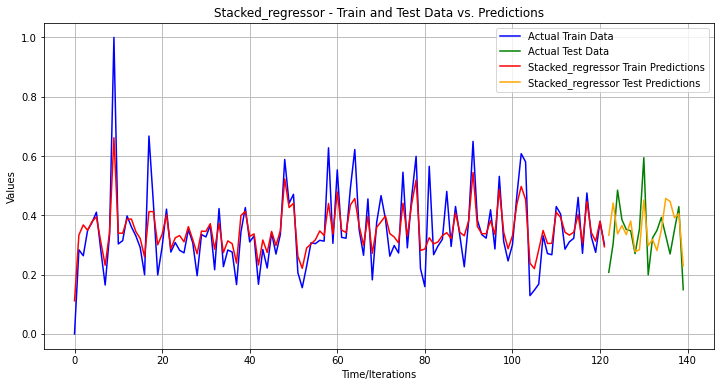

Computation Time: 22.42823624610901
----------------------------------



In [25]:
from sklearn.ensemble import StackingRegressor
stacked = StackingRegressor(
    estimators = specific_stack_model,
    final_estimator = LinearRegression(),
    cv = 5)
start_time = time.time()
evaluate_model(stacked, X_train, y_train, X_test, y_test,"Stacked_regressor",if_plot="Yes")
end_time = time.time()
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------\n")

### Stacking Regressor Mlextend

In [26]:
specific_stack_model_extend = \
[(model) for model_name, model in base_models if model_name in specific_stack_model_list.tolist()]
specific_stack_model_extend

[NuSVR(),
 LinearSVR(),
 GradientBoostingRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),

In [27]:
from mlxtend.regressor import StackingRegressor as StackingRegressor_mlextend


Liblinear failed to converge, increase the number of iterations.


Learning rate set to 0.029365
0:	learn: 0.1328725	total: 3.21ms	remaining: 3.2s
1:	learn: 0.1321333	total: 6.34ms	remaining: 3.17s
2:	learn: 0.1311892	total: 9.44ms	remaining: 3.14s
3:	learn: 0.1304632	total: 12.5ms	remaining: 3.11s
4:	learn: 0.1296152	total: 15.8ms	remaining: 3.15s
5:	learn: 0.1289845	total: 19.2ms	remaining: 3.17s
6:	learn: 0.1283316	total: 22.2ms	remaining: 3.15s
7:	learn: 0.1273610	total: 25.8ms	remaining: 3.2s
8:	learn: 0.1268537	total: 29.2ms	remaining: 3.21s
9:	learn: 0.1259693	total: 32.2ms	remaining: 3.18s
10:	learn: 0.1252586	total: 35.7ms	remaining: 3.21s
11:	learn: 0.1246915	total: 38.7ms	remaining: 3.19s
12:	learn: 0.1239200	total: 41.9ms	remaining: 3.18s
13:	learn: 0.1234780	total: 45ms	remaining: 3.17s
14:	learn: 0.1229429	total: 48.2ms	remaining: 3.17s
15:	learn: 0.1222443	total: 51.8ms	remaining: 3.18s
16:	learn: 0.1219606	total: 55.5ms	remaining: 3.21s
17:	learn: 0.1214257	total: 59.1ms	remaining: 3.22s
18:	learn: 0.1210915	total: 62.3ms	remaining: 3.

176:	learn: 0.0605675	total: 598ms	remaining: 2.78s
177:	learn: 0.0603834	total: 601ms	remaining: 2.78s
178:	learn: 0.0601921	total: 605ms	remaining: 2.77s
179:	learn: 0.0598959	total: 608ms	remaining: 2.77s
180:	learn: 0.0594957	total: 612ms	remaining: 2.77s
181:	learn: 0.0591090	total: 616ms	remaining: 2.77s
182:	learn: 0.0587044	total: 619ms	remaining: 2.77s
183:	learn: 0.0582829	total: 623ms	remaining: 2.76s
184:	learn: 0.0579355	total: 626ms	remaining: 2.76s
185:	learn: 0.0575579	total: 629ms	remaining: 2.75s
186:	learn: 0.0571402	total: 633ms	remaining: 2.75s
187:	learn: 0.0568389	total: 636ms	remaining: 2.75s
188:	learn: 0.0565155	total: 639ms	remaining: 2.74s
189:	learn: 0.0562353	total: 642ms	remaining: 2.74s
190:	learn: 0.0557966	total: 646ms	remaining: 2.73s
191:	learn: 0.0555824	total: 649ms	remaining: 2.73s
192:	learn: 0.0553473	total: 652ms	remaining: 2.73s
193:	learn: 0.0552014	total: 655ms	remaining: 2.72s
194:	learn: 0.0548973	total: 658ms	remaining: 2.72s
195:	learn: 

356:	learn: 0.0224510	total: 1.19s	remaining: 2.15s
357:	learn: 0.0223011	total: 1.19s	remaining: 2.14s
358:	learn: 0.0221863	total: 1.2s	remaining: 2.14s
359:	learn: 0.0220093	total: 1.2s	remaining: 2.13s
360:	learn: 0.0218073	total: 1.2s	remaining: 2.13s
361:	learn: 0.0216219	total: 1.21s	remaining: 2.13s
362:	learn: 0.0214516	total: 1.21s	remaining: 2.12s
363:	learn: 0.0213129	total: 1.21s	remaining: 2.12s
364:	learn: 0.0211640	total: 1.22s	remaining: 2.12s
365:	learn: 0.0211292	total: 1.22s	remaining: 2.11s
366:	learn: 0.0209779	total: 1.22s	remaining: 2.11s
367:	learn: 0.0208044	total: 1.23s	remaining: 2.1s
368:	learn: 0.0207412	total: 1.23s	remaining: 2.1s
369:	learn: 0.0205913	total: 1.23s	remaining: 2.1s
370:	learn: 0.0204364	total: 1.23s	remaining: 2.09s
371:	learn: 0.0202969	total: 1.24s	remaining: 2.09s
372:	learn: 0.0201293	total: 1.24s	remaining: 2.09s
373:	learn: 0.0199807	total: 1.24s	remaining: 2.08s
374:	learn: 0.0197942	total: 1.25s	remaining: 2.08s
375:	learn: 0.0197

526:	learn: 0.0085124	total: 1.78s	remaining: 1.6s
527:	learn: 0.0084366	total: 1.79s	remaining: 1.6s
528:	learn: 0.0083945	total: 1.79s	remaining: 1.6s
529:	learn: 0.0083143	total: 1.8s	remaining: 1.59s
530:	learn: 0.0082601	total: 1.8s	remaining: 1.59s
531:	learn: 0.0081875	total: 1.8s	remaining: 1.59s
532:	learn: 0.0081358	total: 1.81s	remaining: 1.58s
533:	learn: 0.0081081	total: 1.81s	remaining: 1.58s
534:	learn: 0.0080877	total: 1.82s	remaining: 1.58s
535:	learn: 0.0080133	total: 1.83s	remaining: 1.58s
536:	learn: 0.0079551	total: 1.83s	remaining: 1.58s
537:	learn: 0.0079425	total: 1.83s	remaining: 1.57s
538:	learn: 0.0078840	total: 1.84s	remaining: 1.57s
539:	learn: 0.0078533	total: 1.84s	remaining: 1.57s
540:	learn: 0.0078137	total: 1.84s	remaining: 1.56s
541:	learn: 0.0077574	total: 1.85s	remaining: 1.56s
542:	learn: 0.0076909	total: 1.85s	remaining: 1.56s
543:	learn: 0.0076594	total: 1.85s	remaining: 1.55s
544:	learn: 0.0076089	total: 1.86s	remaining: 1.55s
545:	learn: 0.0075

738:	learn: 0.0023629	total: 2.56s	remaining: 903ms
739:	learn: 0.0023495	total: 2.56s	remaining: 900ms
740:	learn: 0.0023453	total: 2.56s	remaining: 897ms
741:	learn: 0.0023408	total: 2.57s	remaining: 893ms
742:	learn: 0.0023260	total: 2.57s	remaining: 890ms
743:	learn: 0.0023147	total: 2.58s	remaining: 886ms
744:	learn: 0.0023120	total: 2.58s	remaining: 883ms
745:	learn: 0.0023099	total: 2.58s	remaining: 879ms
746:	learn: 0.0023045	total: 2.59s	remaining: 876ms
747:	learn: 0.0022870	total: 2.59s	remaining: 873ms
748:	learn: 0.0022685	total: 2.59s	remaining: 869ms
749:	learn: 0.0022596	total: 2.6s	remaining: 866ms
750:	learn: 0.0022426	total: 2.6s	remaining: 862ms
751:	learn: 0.0022269	total: 2.6s	remaining: 858ms
752:	learn: 0.0022077	total: 2.6s	remaining: 855ms
753:	learn: 0.0021878	total: 2.61s	remaining: 851ms
754:	learn: 0.0021827	total: 2.61s	remaining: 848ms
755:	learn: 0.0021634	total: 2.62s	remaining: 844ms
756:	learn: 0.0021446	total: 2.62s	remaining: 841ms
757:	learn: 0.00

923:	learn: 0.0008108	total: 3.15s	remaining: 259ms
924:	learn: 0.0008046	total: 3.15s	remaining: 256ms
925:	learn: 0.0008002	total: 3.16s	remaining: 252ms
926:	learn: 0.0007971	total: 3.16s	remaining: 249ms
927:	learn: 0.0007962	total: 3.17s	remaining: 246ms
928:	learn: 0.0007907	total: 3.17s	remaining: 242ms
929:	learn: 0.0007859	total: 3.17s	remaining: 239ms
930:	learn: 0.0007797	total: 3.17s	remaining: 235ms
931:	learn: 0.0007741	total: 3.18s	remaining: 232ms
932:	learn: 0.0007693	total: 3.18s	remaining: 228ms
933:	learn: 0.0007682	total: 3.18s	remaining: 225ms
934:	learn: 0.0007611	total: 3.19s	remaining: 222ms
935:	learn: 0.0007552	total: 3.19s	remaining: 218ms
936:	learn: 0.0007496	total: 3.19s	remaining: 215ms
937:	learn: 0.0007449	total: 3.2s	remaining: 211ms
938:	learn: 0.0007420	total: 3.2s	remaining: 208ms
939:	learn: 0.0007391	total: 3.21s	remaining: 205ms
940:	learn: 0.0007351	total: 3.21s	remaining: 201ms
941:	learn: 0.0007306	total: 3.22s	remaining: 198ms
942:	learn: 0.

X has feature names, but NuSVR was fitted without feature names
X has feature names, but LinearSVR was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but NuSVR was fitted without feature names
X has feature names, but LinearSVR was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names


---Training data results---

Root Mean Squared Error: 0.00

Mean Absolute Error: 0.00

Mean Absolute Percentage Error: 0.94

R Square: 1.00

-----Testing data results-----

Root Mean Squared Error: 0.07

Mean Absolute Error: 0.06

Mean Absolute Percentage Error: 19.29

R Square: 0.52



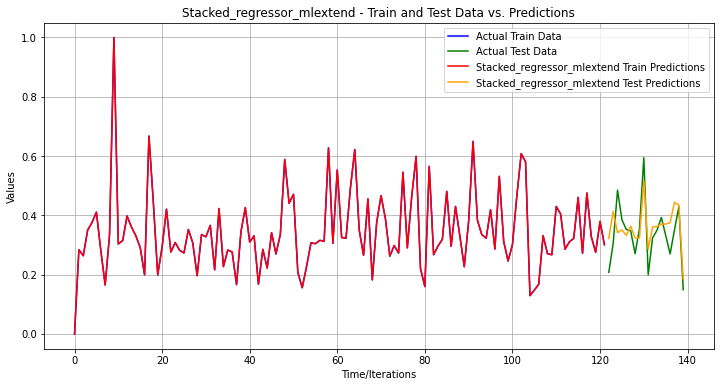

Computation Time: 4.87039041519165
----------------------------------



In [28]:
stregr = StackingRegressor_mlextend(regressors=specific_stack_model_extend, 
                           meta_regressor=GradientBoostingRegressor())
start_time = time.time()
evaluate_model(stregr, X_train, y_train, X_test, y_test,"Stacked_regressor_mlextend",if_plot="Yes")
end_time = time.time()
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------\n")


### Voting Regressor

In [29]:
from sklearn.ensemble import VotingRegressor

---Training data results---

Root Mean Squared Error: 0.03

Mean Absolute Error: 0.01

Mean Absolute Percentage Error: 4.81

R Square: 0.96

-----Testing data results-----

Root Mean Squared Error: 0.08

Mean Absolute Error: 0.07

Mean Absolute Percentage Error: 21.33

R Square: 0.35



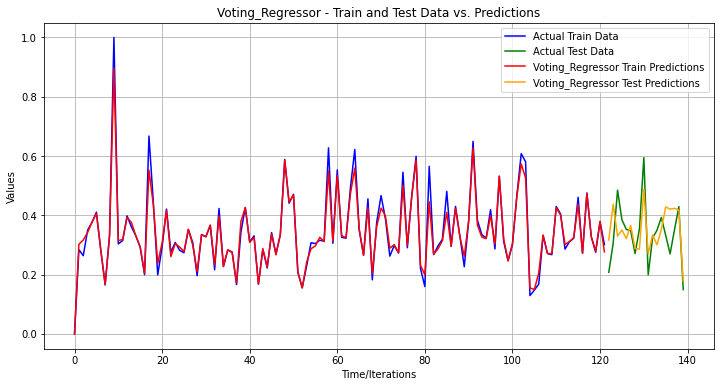

Computation Time: 8.616936206817627
----------------------------------



In [30]:
vtregr = VotingRegressor(estimators=specific_stack_model,n_jobs=-1)
start_time = time.time()
evaluate_model(vtregr, X_train, y_train, X_test, y_test,"Voting_Regressor",if_plot="Yes")
end_time = time.time()
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------\n")
